In [3]:
from skimage.io import imread
import matplotlib.pyplot as plt

sudoku_extracted = imread('../resources/download.png')
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(sudoku_extracted)
plt.show()

<Figure size 1000x1000 with 1 Axes>

/home/wolf/.local/lib/python2.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/wolf/.local/lib/python2.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


[0, 100, 100, 0]

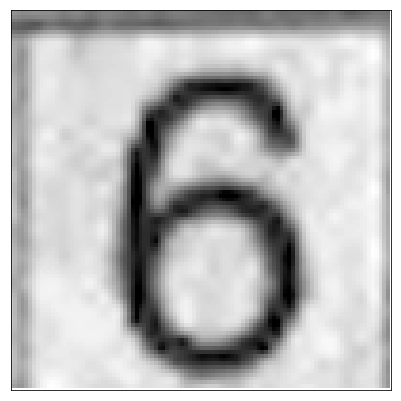

In [6]:
from skimage.color import rgb2gray
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import numpy as np
import skimage 

img = skimage.transform.resize(rgb2gray(sudoku_extracted), (900,900))
s = np.linspace(0, 2*np.pi, 400)
x = 220 + 100*np.cos(s)
y = 100 + 100*np.sin(s)
init = np.array([x, y]).T

img = img[0:100,400:500]

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

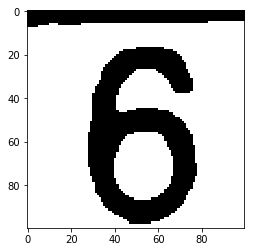

In [8]:
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

image = img_as_float(img)
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

# fig, axes = plt.subplots(2, 2, figsize=(8, 8))
# ax = axes.flatten()

# ax[0].imshow(image, cmap="gray")
# ax[0].set_axis_off()
# ax[0].set_title("Original Image", fontsize=12)

# ax[1].imshow(cv[0], cmap="gray")
# ax[1].set_axis_off()
# title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
# ax[1].set_title(title, fontsize=12)

# ax[2].imshow(cv[1], cmap="gray")
# ax[2].set_axis_off()
# ax[2].set_title("Final Level Set", fontsize=12)

# ax[3].plot(cv[2])
# ax[3].set_title("Evolution of energy over iterations", fontsize=12)

# fig.tight_layout()
plt.imshow(cv[0], cmap="gray")
plt.show()